# **Telecom Capstone Project**

## Table of Contents
1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Analysing Events dataset ](#section301)<br>
  - 3.2 [Gender dataset analysis ](#section302)<br>
  - 3.3 [Brand dataset analysis ](#section303)<br>
  - 3.4 [Merged Dataset ](#section304)<br>
4. [Exploratory Data Analysis](#section4)<br>
  - 4.1 [Distribution of Customers across  states](#section401)<br>
  - 4.2 [Mobile Phone users based on Gender ](#section402)<br>
  - 4.3 [The average age of Male & Female Mobile users in India ](#section403)<br>
  - 4.4 [Which age group uses phone the most ? ](#section404)<br>
  - 4.5 [Top mobile brands in India ](#section405)<br>
  - 4.6 [Mobile usage per day hour ](#section406)<br>
  - 4.7 [Geographical representaion of mobile customers ](#section407)<br>
  - 4.8 [Heatmap showing  customer density ](#section408)<br>
  - 4.9 [Map showing the location of each customers ](#section409)<br>
  
 5. [Conclusion](#section500)<br>
  - 5.1 [Actionable Insights](#section501)

<a id=section1></a>
## 1. Problem Statement


To understand the user's demographic charactrsatics based on their mobile usage, geolocation and mobile device properties.
From this information , data driven marketing, according to the usage and geolocation can be done more efficiently.

<a id=section2></a>
## 2. Importing Packages

In [1]:
!pip install mysql-connector

     |████████████████████████████████| 11.9MB 1.4MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl size=247949 sha256=830ae011133560183598dee17ff98770be5baa5fb788b4e992e2f13f8bfa1a9b
  Stored in directory: /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
Successfully built mysql-connector


In [2]:
!pip install folium 

In [3]:
!pip install plotly

<a id=section3></a>
## 3. Loading Data

In [4]:
import mysql.connector
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import datetime as dt


# import folium
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
#import chart_studio.plotly as py
from plotly import tools

init_notebook_mode(connected=True)

Connecting to DB and importing  data

In [0]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  passwd="student",
  database = 'Capstone1'
)

In [0]:
# Getting data from SQL DB 

query = 'select * from phone_brand_device_model'
brand = pd.read_sql(query, con = mydb)

query2 = 'select * from gender_age_train'
gender_age = pd.read_sql(query2, con = mydb)

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [8]:
 #  mapping google drive
from google.colab import drive
drive.mount('/content/drive')

# importing events dataset from Gdrive
events = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone/events_data.csv')

Mounted at /content/drive


In [0]:
# reading events file in Jupiter (if opening in local machine)
#events = pd.read_csv('events_data.csv')


<a id=section301></a>
###  3.1 Analysing Events dataset

In [10]:
events.isnull().sum()

event_id     0 
device_id    0 
timestamp    0 
longitude    0 
latitude     0 
city         0 
state        49
dtype: int64

Analysing the state column

In [0]:
Null_state = events.isna().any(axis = 1)

In [12]:
events[Null_state].city.unique()

array(['Jaipur'], dtype=object)

In [0]:
del Null_state

In [0]:
# filling Nan values with State values Rajasthan
events['state'].fillna('Rajasthan',inplace=True)

In [15]:
events.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

Thus the state has no null values as we fixed with Rajasthan

In [16]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370982 entries, 0 to 370981
Data columns (total 7 columns):
event_id     370982 non-null int64
device_id    370982 non-null int64
timestamp    370982 non-null object
longitude    370982 non-null float64
latitude     370982 non-null float64
city         370982 non-null object
state        370982 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 19.8+ MB


In [17]:
events.describe()

,event_id,device_id,longitude,latitude
count,3.709820e+05,3.709820e+05,370982.000000,370982.000000
mean,1.637170e+06,2.464464e+17,78.300667,26.439687
std,9.333294e+05,5.294837e+18,4.318853,2.531584
min,1.497900e+04,-9.221640e+18,0.000000,0.000000
25%,8.364775e+05,-4.320002e+18,75.845087,26.514833
50%,1.631902e+06,3.058488e+17,75.896461,26.969699
75%,2.444830e+06,4.896346e+18,79.449851,27.232018
max,3.252947e+06,9.221843e+18,95.459457,41.871900


This shows that the longitude and latitude values are null so we need to fix it using appropriate values 


In [18]:
null_co_ord  = events.query('longitude == 0 | latitude == 0').drop_duplicates('state')
null_co_ord

,event_id,device_id,timestamp,longitude,latitude,city,state
31435,157009,4580179444377397556,2016-05-04 18:37:19,0.0,0.0,Jaipur,Rajasthan


In [0]:
# Finding the average of latitude and longitude where state = Rajasthan
long_avg = events.loc[(events['state'] == 'Rajasthan'),'longitude'].mean()
lat_avg = events.loc[(events['state']=='Rajasthan'), 'latitude'].mean()

In [0]:
events.loc[(events['longitude']== 0.0) & (events['state'] == 'Rajasthan'), 'longitude'] = long_avg

In [0]:
events.loc[(events['latitude'] == 0.0) & (events['state'] == 'Rajasthan'), 'latitude'] = lat_avg

In [22]:
events.query('longitude == 0 | latitude == 0')
# No null values in longitude and latitude

,event_id,device_id,timestamp,longitude,latitude,city,state


In [23]:
events.query('timestamp == 0' )

# NO Null values in timestamp

,event_id,device_id,timestamp,longitude,latitude,city,state


In [24]:
events.query('device_id == 0').drop_duplicates('longitude')

,event_id,device_id,timestamp,longitude,latitude,city,state
15252,127874,0,2016-05-02 10:22:32,75.846007,26.960796,Jaipur,Rajasthan
21732,99694,0,2016-05-03 08:29:11,75.836167,26.953990,Jaipur,Rajasthan
143518,86147,0,2016-05-07 12:56:06,75.888487,26.948689,Jaipur,Rajasthan


In [0]:
mapping_device_id = events.query('device_id != 0').drop_duplicates('longitude').set_index('longitude').device_id

In [26]:
mapping_device_id

longitude
78.566758    4112232520748712732
78.493221    8845954542270213082
78.506225    8322396725169306034
78.535171   -7896407431879189166
78.510305    3508989809324087543
                    ...         
82.235358   -2693067650786404071
93.045659    806503651394725331 
78.810885   -8311901742233721562
77.859578    5093742074652555674
73.751181    2028172110805332826
Name: device_id, Length: 12429, dtype: int64

In [0]:
events['device_id'] = events['longitude'].map(mapping_device_id).fillna('0')

In [28]:
# No Null values in device_id
events.query('(device_id == 0) | (device_id == "NaN")').drop_duplicates('longitude')

,event_id,device_id,timestamp,longitude,latitude,city,state


In [0]:
events.drop(columns = 'city', inplace = True)

In [62]:
# To print the difference between length of events = nan values in events 
# 0 means there are no nullor zero values

print(len(events) -len(events.dropna()))

0


Now, Events dataset does not have any NaN values


<a id=section302></a>

###  3.2  Gender data analysis

In [63]:
gender_age.shape

(74645, 4)

In [64]:
print(gender_age.isnull().sum(),'\n')
print('\n',gender_age.info())

device_id    0
gender       0
age          0
group        0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB

 None


In [65]:
gender_age.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410409
std,5.327150e+18,9.868546
min,-9.223067e+18,6.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


This shows that a baby of age 1 is using mobile which is not logical but it is a minor error 

In [66]:
# Just tried it with lambda function
gender_age.loc[lambda gender_age :((gender_age['age']>0) & (gender_age['age']<10))]

,device_id,gender,age,group
10385,3553057874282315257,M,6,M22-
60779,-8513863533705424532,M,6,M22-
60831,-5323874218045578676,M,6,M22-
60832,3646841514566479686,M,6,M22-
60833,5222152119137955379,M,6,M22-


In [0]:
# Replacing the one year old baby with 6 year old child 
gender_age.age.replace(1, 6, inplace = True)

This shows that one baby is using phone and it is not logical
so changing age to 6 for ease of understanding

In [68]:
gender_age.loc[lambda gender_age: gender_age.age<10]  # Corrected dataset from minor error

,device_id,gender,age,group
10385,3553057874282315257,M,6,M22-
60779,-8513863533705424532,M,6,M22-
60831,-5323874218045578676,M,6,M22-
60832,3646841514566479686,M,6,M22-
60833,5222152119137955379,M,6,M22-


In [69]:
gender_age.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410409
std,5.327150e+18,9.868546
min,-9.223067e+18,6.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


Checking whether Device_ID has nan or 0 values?

In [70]:
# Cannot find any or 0 values 
gender_age.loc[(gender_age.device_id == '0')]

,device_id,gender,age,group


In [71]:
gender_age.query('(device_id == "NaN") | (group == 0)')

,device_id,gender,age,group


In [72]:
# checking the differnce between length of dataset - dataset after droping NaN values

print(len(gender_age)- len(gender_age.dropna()))   

0



<a id=section303></a>
### 3.3 Brand analysis

In [73]:
print(brand.head())
print(brand.isnull().sum())

             device_id phone_brand device_model
0  1877775838486905855  vivo        Y13        
1 -3766087376657242966  Xiaomi      V183       
2 -6238937574958215831  OPPO        R7s        
3  8973197758510677470  Samsung     A368t      
4 -2015528097870762664  Xiaomi      红米Note2    
device_id       0
phone_brand     0
device_model    0
dtype: int64


In [0]:
replace_dictionary = { '华为'	:'Huawei',
                      '小米'	:'Xiaomi',
                      '三星'	:'Samsung',
                      'vivo'	:'vivo',
                      'OPPO'	:'OPPO',
                      '魅族'	:'Meizu',
                      '酷派'	:'Coolpad',
                      '乐视'	:'LeEco',
                      '联想 '	:'Lenovo',
                      'HTC'	:'HTC',}

In [0]:
brand.phone_brand = brand.phone_brand.replace(replace_dictionary)

In [76]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [77]:
brand.loc[(brand.phone_brand == 0)| (brand.device_id == 0) | (brand.device_model == 0)]


,device_id,phone_brand,device_model


In [78]:
brand.loc[(brand.phone_brand == 'NaN')| (brand.device_id == 'NaN') | (brand.device_model == 'NaN')]

,device_id,phone_brand,device_model


So there are no null values in Brand dataset

<a id=section304></a>
### 3. 4  merging done below : 

In [79]:
print(brand.count())
print(events.count())
print(gender_age.count())

device_id       87726
phone_brand     87726
device_model    87726
dtype: int64
event_id     370982
device_id    370982
timestamp    370982
longitude    370982
latitude     370982
state        370982
dtype: int64
device_id    74645
gender       74645
age          74645
group        74645
dtype: int64


Creating Train dataset

In [0]:
train = pd.merge(events, brand, how = 'left' , on = 'device_id')

In [0]:
train = pd.merge(train,  gender_age, how = 'left', on = 'device_id' )

In [82]:
train.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
state           0
phone_brand     0
device_model    0
gender          0
age             0
group           0
dtype: int64

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 0 to 370981
Data columns (total 11 columns):
event_id        370982 non-null int64
device_id       370982 non-null int64
timestamp       370982 non-null object
longitude       370982 non-null float64
latitude        370982 non-null float64
state           370982 non-null object
phone_brand     370982 non-null object
device_model    370982 non-null object
gender          370982 non-null object
age             370982 non-null int64
group           370982 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 34.0+ MB


In [0]:
# removing the device model column
train.drop(columns = 'device_model', inplace = True)

In [85]:
train.shape

(370982, 10)

Now, it is time to analyse the NaN values in train

In [86]:
train.describe()

,event_id,device_id,longitude,latitude,age
count,3.709820e+05,3.709820e+05,370982.000000,370982.000000,370982.000000
mean,1.637170e+06,2.538031e+17,78.314126,26.444480,30.967174
std,9.333294e+05,5.306522e+18,4.190801,2.506905,9.820502
min,1.497900e+04,-9.221640e+18,12.567400,17.410056,10.000000
25%,8.364775e+05,-4.314873e+18,75.845087,26.514833,24.000000
50%,1.631902e+06,3.058488e+17,75.896461,26.969699,29.000000
75%,2.444830e+06,4.918797e+18,79.449851,27.232018,35.000000
max,3.252947e+06,9.221843e+18,95.459457,41.871900,96.000000


In [0]:
train.age = train.age.astype('int64')

In [88]:
print(train.isnull().sum())
print(train.info())

event_id       0
device_id      0
timestamp      0
longitude      0
latitude       0
state          0
phone_brand    0
gender         0
age            0
group          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 0 to 370981
Data columns (total 10 columns):
event_id       370982 non-null int64
device_id      370982 non-null int64
timestamp      370982 non-null object
longitude      370982 non-null float64
latitude       370982 non-null float64
state          370982 non-null object
phone_brand    370982 non-null object
gender         370982 non-null object
age            370982 non-null int64
group          370982 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 31.1+ MB
None


Thus train doesnot have any null values

  We could see that timestamp is not in datetime format


In [89]:
train.timestamp.head()

0    2016-05-06 23:07:41
1    2016-05-04 12:34:38
2    2016-05-04 11:08:31
3    2016-05-07 23:34:30
4    2016-05-07 23:31:37
Name: timestamp, dtype: object

In [0]:
train.timestamp = train.timestamp.apply(lambda x : pd.to_datetime(str(x)))

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 0 to 370981
Data columns (total 10 columns):
event_id       370982 non-null int64
device_id      370982 non-null int64
timestamp      370982 non-null datetime64[ns]
longitude      370982 non-null float64
latitude       370982 non-null float64
state          370982 non-null object
phone_brand    370982 non-null object
gender         370982 non-null object
age            370982 non-null int64
group          370982 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 31.1+ MB


In [0]:
train['month'] = train.timestamp.dt.month
train['hour'] = train.timestamp.dt.hour

In [0]:
#train.to_csv('train.csv')


<a id=section4></a>
###  4 .  Exploratory data analysis

<a id=section401></a>
### 4.1 Distribution of Customers across  states

Text(0.5, 1.0, 'Distibution of customers accross  states')

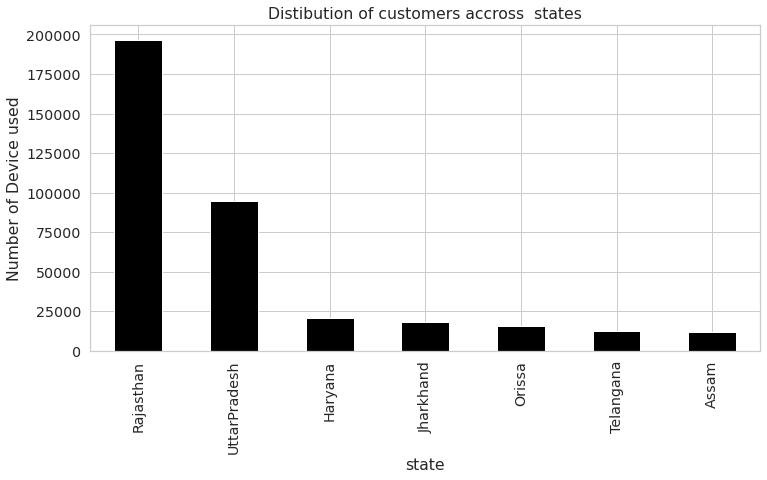

In [95]:
train.groupby(['state'])['device_id'].count().sort_values(ascending = False).plot(kind='bar', figsize=(12, 6),color = 'black')
plt.xlabel('state')
plt.ylabel('Number of Device used')
plt.title('Distibution of customers accross  states')

<a id=section402></a>
### 4.2 Mobile Phone users based on Gender 

Text(0.5, 1.0, 'Pie Plot showing Distribution of  users based on Gender in India')

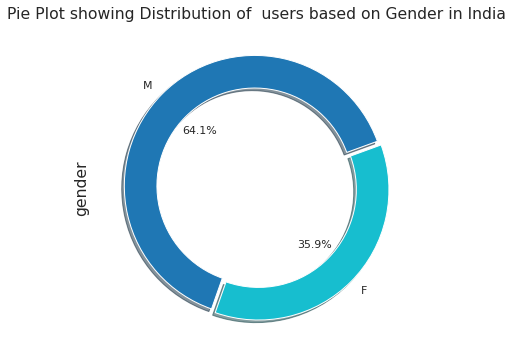

In [96]:
train['gender'].value_counts().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.25), 
                                figsize=(6, 6), explode=[0.02,0.02],fontsize=11, startangle=20, shadow=True,cmap='tab10')

plt.title('Pie Plot showing Distribution of  users based on Gender in India')

<a id=section403></a>
###  4.3 The average age of Male & Female Mobile users in India


Text(0.5, 1.0, 'The average age of Male & Female Mobile users in India')

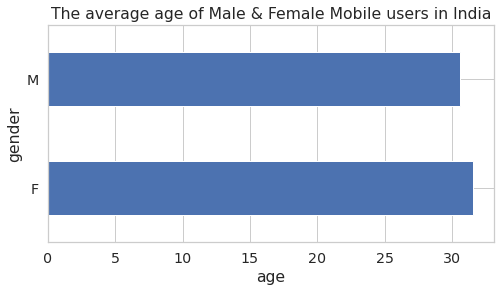

In [97]:
train.groupby(['gender'])['age'].mean().plot(kind='barh', figsize=(8, 4))
plt.xlabel('age')
plt.ylabel('gender')
plt.title('The average age of Male & Female Mobile users in India')

<a id=section404></a>
###  4.4 Which age group uses phone the most ?

Text(0.5, 1.0, 'Donut Plot showing the distribution of device per age group')

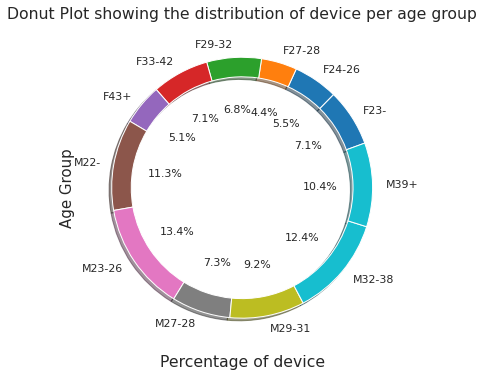

In [100]:
train.groupby(['group'])['device_id'].count().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                figsize=(6, 6), fontsize=11, startangle=20, shadow=True, cmap='tab10')
plt.ylabel('Age Group', fontsize=15)
plt.xlabel("Percentage of device")
plt.title('Donut Plot showing the distribution of device per age group')

<a id=section405></a>
### 4.5 Top mobile brands in India

In [0]:
branded_phone = ['Huawei','Xiaomi','Samsung','vivo','OPPO','Meizu','Coolpad','LeEco','Lenovo','HTC']

In [0]:
a = train[train.phone_brand.isin(branded_phone)]

In [103]:
a.groupby('phone_brand')['device_id'].count()

phone_brand
Coolpad    15527
HTC        5477 
Huawei     61914
LeEco      2784 
Lenovo     4104 
Meizu      22360
OPPO       26205
Samsung    81354
Xiaomi     97894
vivo       33134
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Top Mobile brands in India')

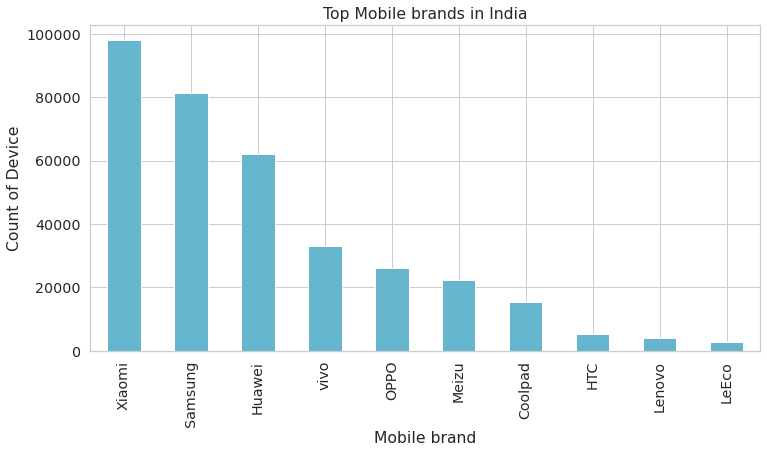

In [104]:
plt.figure(figsize = (12,6))
a.groupby(['phone_brand'])['device_id'].count().sort_values(ascending = False).plot(kind='bar',color = 'c')
plt.xlabel('Mobile brand')
plt.ylabel('Count of Device')
plt.title('Top Mobile brands in India')

<a id=section406></a>
### 4.6 Mobile usage per day hour

In [105]:
train.groupby(['age'])['hour'].count()

age
10    20 
11    2  
12    9  
13    24 
14    261
     ... 
81    5  
83    6  
86    3  
89    210
96    8  
Name: hour, Length: 75, dtype: int64

Text(0.5, 1.0, 'mobile usage per day hour')

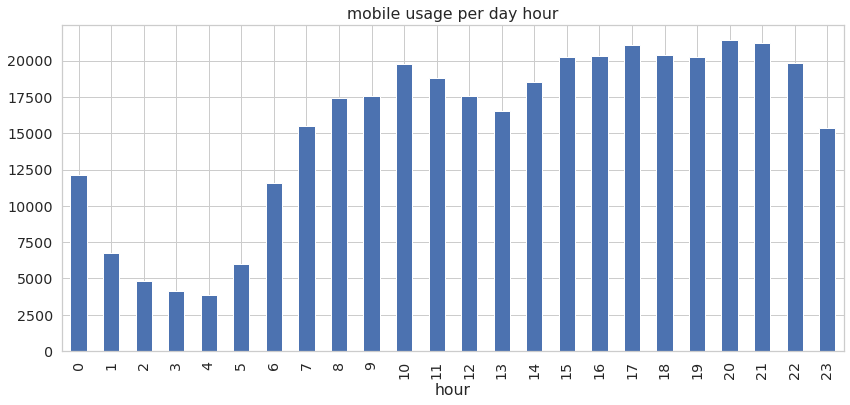

In [128]:
train.groupby(['hour'])['age'].count().plot(kind = 'bar',figsize = (14,6))
plt.title("mobile usage per day hour")

In [109]:
a.head(2)

,event_id,device_id,timestamp,longitude,latitude,state,phone_brand,gender,age,group,month,hour
0,616897,4112232520748712732,2016-05-06 23:07:41,78.566758,17.481422,Telangana,Xiaomi,M,23,M23-26,5,23
1,2699320,4112232520748712732,2016-05-04 12:34:38,78.566758,17.481422,Telangana,Xiaomi,M,23,M23-26,5,12


<a id=section407></a>

### 4. 7 Geographical representaion of mobile customers 

In [0]:
import folium
from folium import plugins

In [130]:
train.groupby('device_id')['latitude','longitude'].mean()[:3]

,latitude,longitude
device_id,,
-9221639938103564513,26.989676,75.816956
-9221086586254644858,29.163193,77.937409
-9220727250496861488,26.979703,75.822490


<a id=section408></a>
### 4.8  Heatmap showing  customer density

In [131]:
stationArr = train.groupby('device_id')['latitude','longitude'].mean().values
# plot heatmap
m = folium.Map(stationArr[0], zoom_start=5,tiles='Stamen Toner')
m.add_child(folium.plugins.HeatMap(stationArr, radius=15))

<a id=section409></a>
### 4.9 Map showing the location of each customers 

### Click on the cirlce to expand 

In [134]:
# plot FastMarkerCuster map
m = folium.Map(stationArr[0], zoom_start= 5)
m.add_child(folium.plugins.FastMarkerCluster(stationArr))

<a id=section409></a>
### 5. Conclusion

From this analysis we are able to understand the characteristics of customers using different mobile brands and their demographic dividend

This can be used to understand the trend in marketing mobile phone


<a id=section409></a>
### 5.1. Actionable insights




*    Mobile is mostly used in between time 14:00 and 22:00 hours in India this shows that mobiles with more battery backup are good players in market to serve this long period

*   Xiaomi, Samsung and Huawei are the most sold phone in India


*   Male users of Age group 23-26 and Female users of age group 33 to 42 uses mobile the most 
*   Male customers count to 65.1% and  Female to 35.9%

The best market to Launch any new brand is in Rajasthan, followed by UP and Haryana

South-Asian companies are the best market players

# Thank you 